# Sales Analysis Project

## Introduction

This project aims to analyze the sales data for a new product line using three different sales methods. The analysis will help determine the most effective sales strategy based on customer data and revenue generated.

**Objective:**
- Validate and clean the provided sales data.
- Perform exploratory data analysis (EDA) to answer specific business questions.
- Define a key business metric for monitoring performance.
- Summarize findings and provide recommendations.
- Prepare a presentation to deliver insights to the sales team.

**Data Columns:**
- `week`: Week sale was made (counted as weeks since product launch).
- `sales_method`: Sales method used (email, call, email and call).
- `customer_id`: Unique identifier for the customer.
- `nb_sold`: Number of new products sold.
- `revenue`: Revenue from the sales.
- `years_as_customer`: Number of years the customer has been buying from the company.
- `nb_site_visits`: Number of times the customer has visited the website in the last 6 months.
- `state`: Customer's location.




## Data Validation and Cleaning

In this section, we will load the sales data and perform validation and cleaning steps to ensure data quality.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/product_sales.csv')

# Display the first few rows of the dataset
data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


## Check for Missing Values
We will check for any missing values in the dataset.

In [2]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

<Axes: >

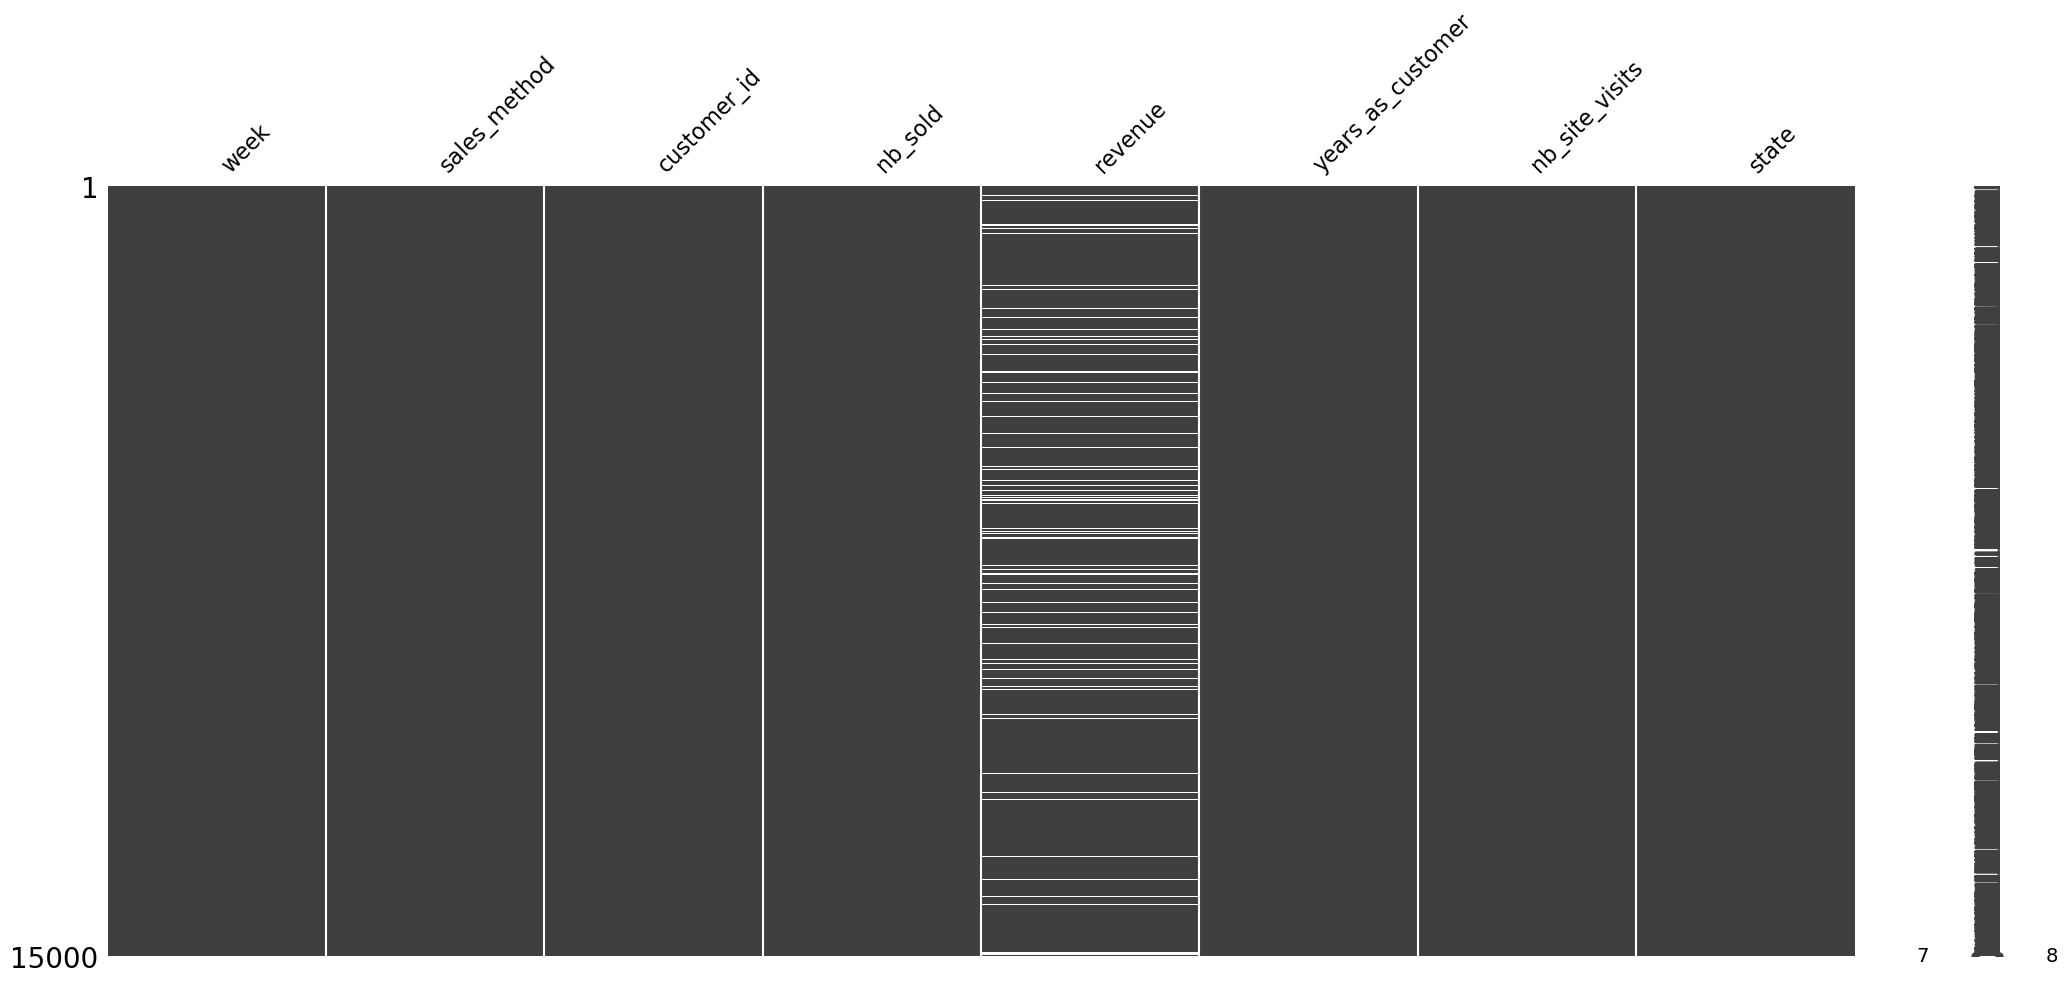

In [3]:
import missingno as msno
msno.matrix(data)

In [4]:
# Fill missing 'revenue' values with the mean
data['revenue'].fillna(data['revenue'].mean(), inplace=True)

# or

# # Fill missing 'revenue' values with the median
# data['revenue'].fillna(data['revenue'].median(), inplace=True)

### Ensure Correct Data Types

Next, we will ensure that each column has the correct data type.


In [5]:
data.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [8]:
# Correct naming errors in the `sales_method` column
data['sales_method'] = data['sales_method'].replace({
    'email': 'Email',
    'em + call': 'Email + Call'
})

In [10]:
# Ensure data types are correct
data['week'] = data['week'].astype(int)
data['sales_method'] = data['sales_method'].astype('category')
data['customer_id'] = data['customer_id'].astype('category')
data['nb_sold'] = data['nb_sold'].astype(int)
data['revenue'] = data['revenue'].astype(float)
data['years_as_customer'] = data['years_as_customer'].astype(int)
data['nb_site_visits'] = data['nb_site_visits'].astype(int)
data['state'] = data['state'].astype('category')

# Verify data types
data.dtypes


week                    int32
sales_method         category
customer_id          category
nb_sold                 int32
revenue               float64
years_as_customer       int32
nb_site_visits          int32
state                category
dtype: object

## Step 3: Exploratory Data Analysis (EDA)
Add markdown and code for exploratory analysis.

### Number of Customers per Approach

We will count the number of unique customers for each sales method.


In [9]:
# Number of customers per approach
customers_per_method = data.groupby('sales_method')['customer_id'].nunique()
customers_per_method


sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64

### Revenue Distribution
We will examine the distribution of revenue overall and for each sales method.

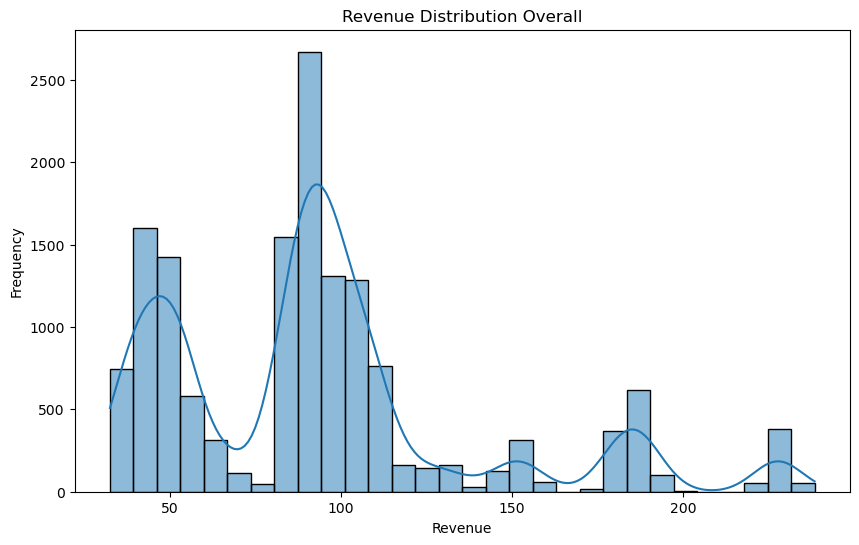

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Revenue distribution overall
plt.figure(figsize=(10, 6))
sns.histplot(data['revenue'], bins=30, kde=True)
plt.title('Revenue Distribution Overall')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


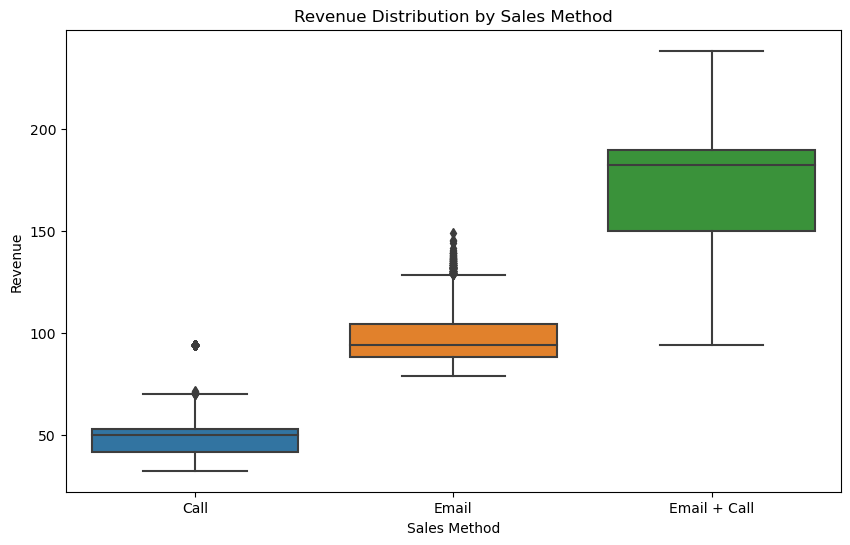

In [12]:
# Revenue distribution per sales method
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_method', y='revenue', data=data)
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

### Revenue Over Time

We will analyze how revenue changes over time for each sales method.


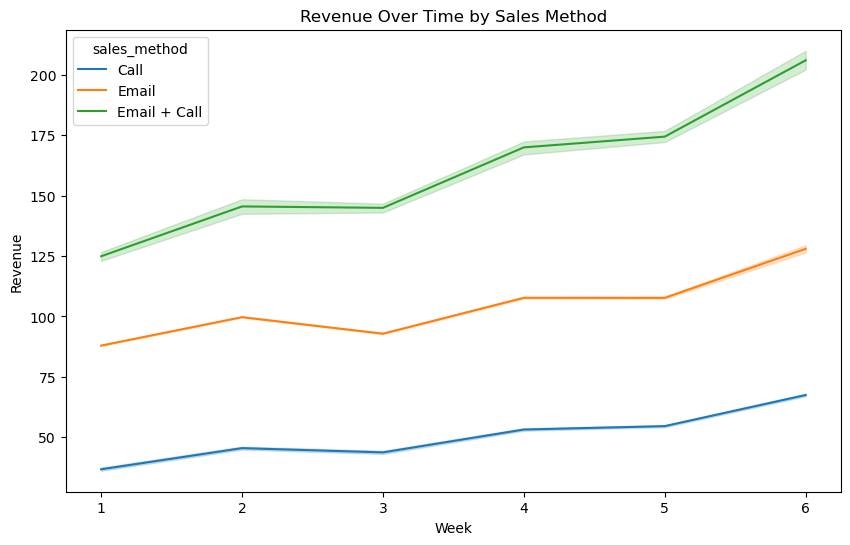

In [13]:
# Revenue over time for each method
plt.figure(figsize=(10, 6))
sns.lineplot(x='week', y='revenue', hue='sales_method', data=data)
plt.title('Revenue Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.show()

### Customer Differences by Method

We will compare customer characteristics such as years as a customer and number of site visits across different sales methods.


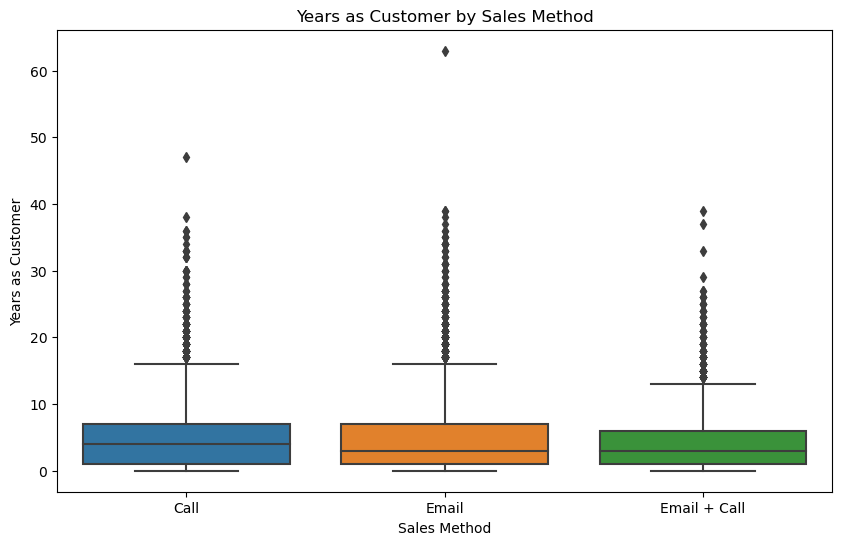

In [14]:
# Years as customer by sales method
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_method', y='years_as_customer', data=data)
plt.title('Years as Customer by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')
plt.show()


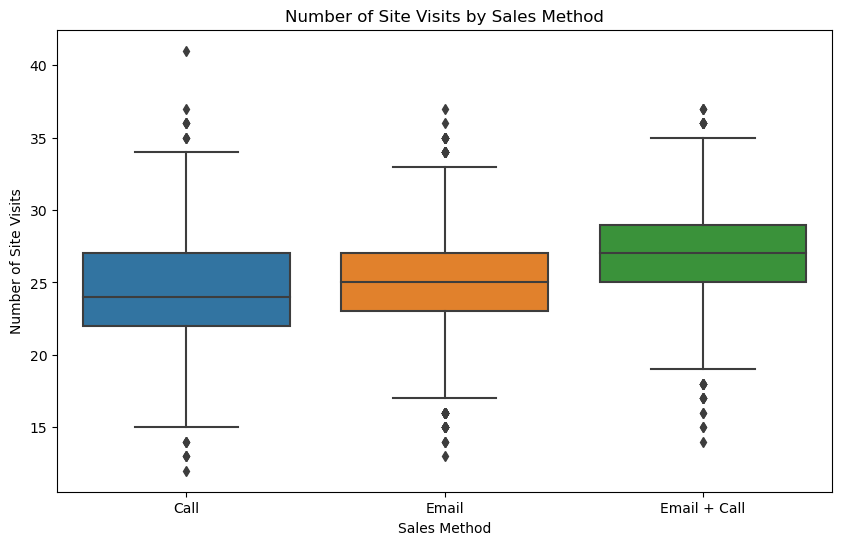

In [15]:
# Number of site visits by sales method
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_method', y='nb_site_visits', data=data)
plt.title('Number of Site Visits by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Site Visits')
plt.show()

## Define a Business Metric

We will define a key metric to monitor the performance of the sales methods. The chosen metric is **average revenue per customer**.


In [16]:
# Define a business metric: Average revenue per customer
avg_revenue_per_customer = data.groupby('sales_method')['revenue'].mean()
avg_revenue_per_customer

sales_method
Call             49.287730
Email            96.895049
Email + Call    171.477444
Name: revenue, dtype: float64

## Summary and Recommendations

### Key Findings
- **Number of Customers**: The number of unique customers for each sales method.
- **Revenue Distribution**: The spread of revenue overall and for each sales method.
- **Revenue Trends**: How revenue changes over time for each sales method.
- **Customer Characteristics**: Differences in years as a customer and number of site visits across sales methods.
- **Average Revenue per Customer**: Calculated for each sales method.

### Recommendations
Based on the analysis, we recommend the following:
- **Best Sales Method**: Email + Call based on highest average revenue per customer.
- **Additional Insights**: Consider targeting customers with longer relationships or higher website engagement for future sales strategies.
- **Next Steps**: Further analysis on customer feedback and satisfaction to refine sales approaches.
